<h1><center>
    ECE 438 - Laboratory 9a<br/>
    Speech Processing (Week 1)<br/>
    <small>Last Updated on March 29, 2022</small><br/>
    <br/>
    Date:<br/>
    Section:<br/>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Student Name #1 [---%]| | |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Understanding differences between voiced/unvoiced segments(30 pts)**: *Python plots and code(zero cross), questions*||||
|**Understanding and implementation of short-time DTFT (30 pts)**: *Python plots and code(DFTwin), questions*||||
|**Understanding and implementation of spectrogram (40 pts)**: *Python plots and code(specgm), questions, formant estimates*||||

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd
from helper import hamming

In [89]:
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# make sure the plot is displayed in this notebook
%matplotlib inline

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h3 style="color:red;"><left>Exercise 2.2: Classification of Voiced/Unvoiced Speech</left></h3>

**1. Load the audio `Start.wav` using `start, fs = sf.read("Start.wav")`.**

In [90]:
# insert your code here
start, fs = sf.read("Start.wav")


**2. Plot (not stem) the speech signal. Then identify two segments of the signal: one segment that is voiced and a second segment that is unvoiced. To identify them, you can choose one from the following options:**
  * a. Circle the regions of the plot of the speech signal corresponding to these two segments.
  * b. Plot the regions corresponding to these two segments separately in new cells.
  * c. Print the starting and ending indices of these two regions.

In [91]:
# # temporarily make the plot interactive
# %matplotlib notebook
# # specify the size of the plot
# plt.rcParams['figure.figsize'] = (12, 6)

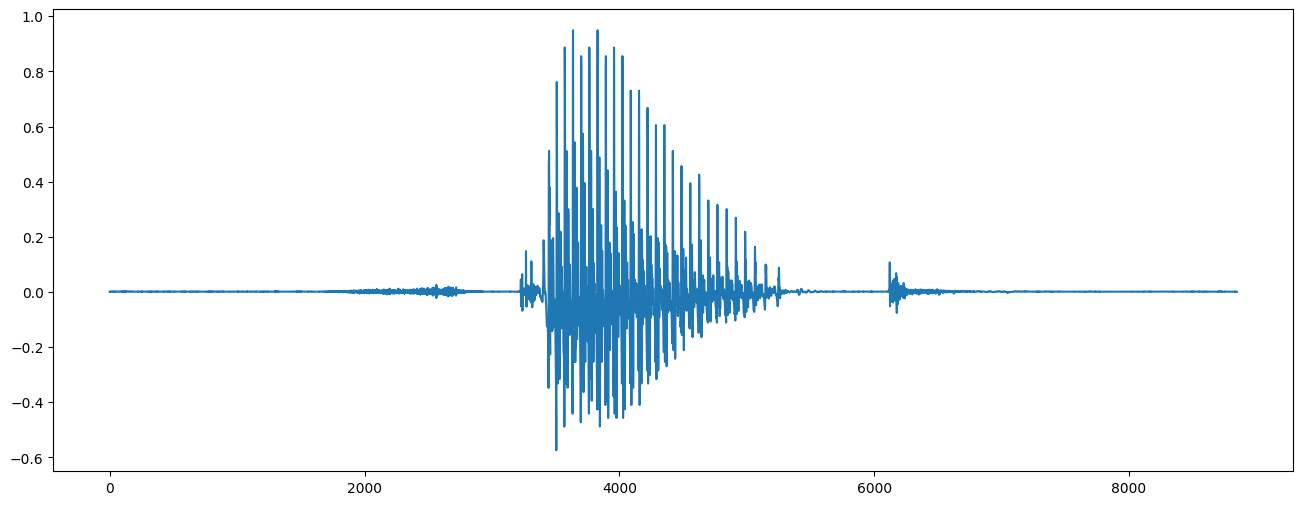

In [92]:
# insert your code here
plt.plot(start)

In [93]:
# make the plot not interactive
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

**2. Extract $300$ samples from the voiced segment of the speech into a NumPy vector called ```VoicedSig```. Also, extract $300$ samples from the unvoiced segment of the speech into a NumPy vector called ```UnvoicedSig```.**

In [94]:
# insert your code here
VoicedSig = start[4000:4301]
UnvoicedSig = start[2000:2301]


**3. Plot the two signals, ```VoicedSig``` and ```UnvoicedSig```.**

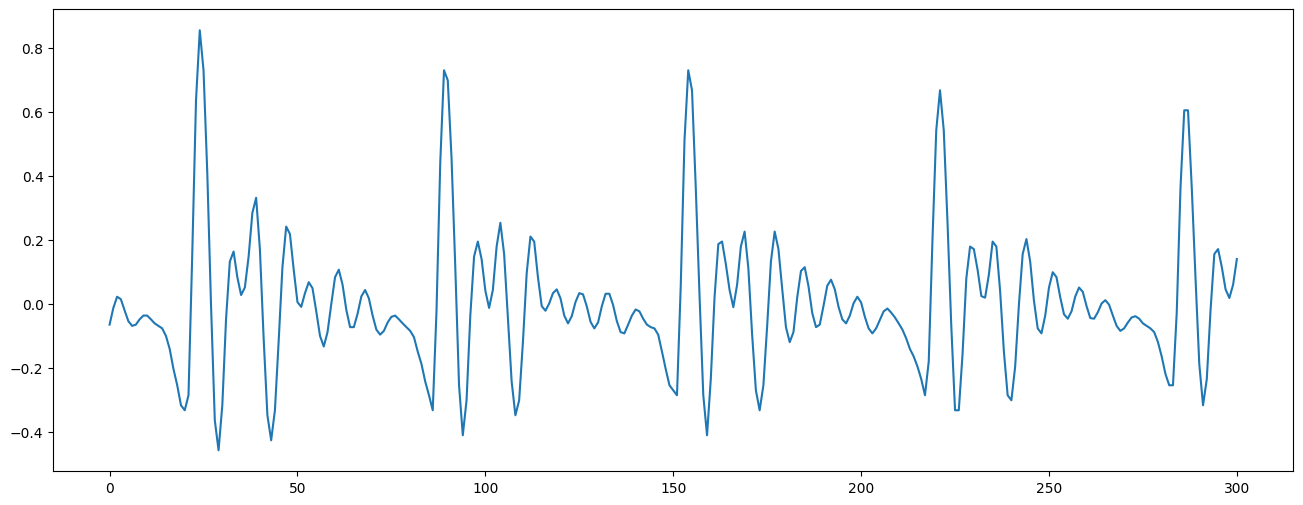

In [95]:
# insert your code here
plt.plot(VoicedSig)


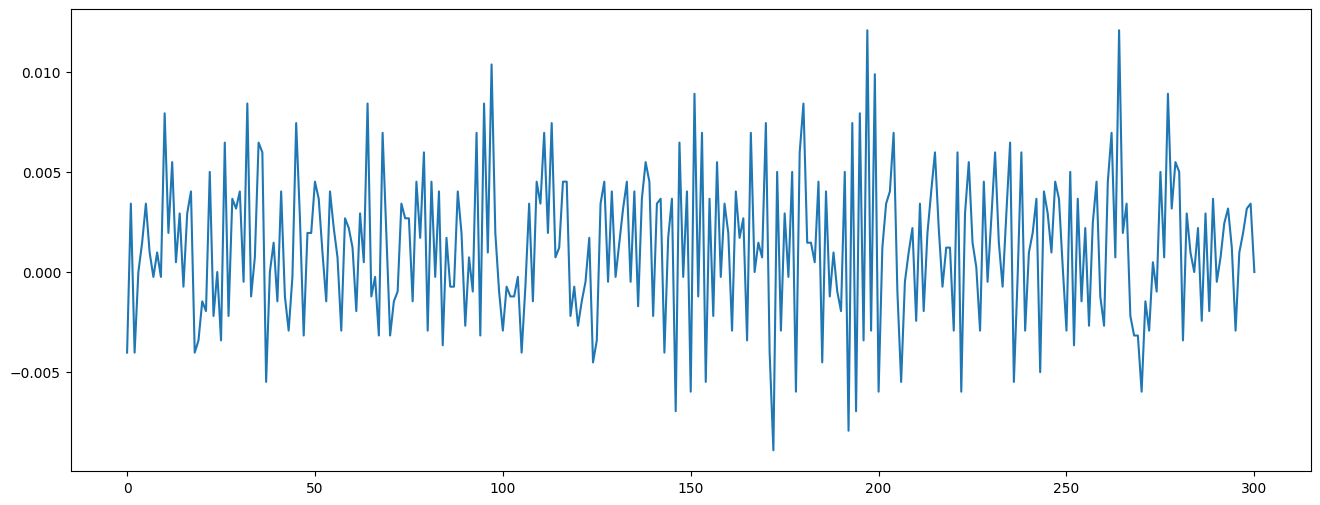

In [96]:
plt.plot(UnvoicedSig)

**4. Explain how you selected your voiced and unvoiced regions.**

insert your answer here

**5. Estimate the pitch period for the voiced segment. Keep in mind that these speech signals are sampled at $8$ KHz, which means that the time between samples is $0.125$ milliseconds (ms). Typical values for the pitch period are $8$ ms for male speakers, and $4$ ms for female speakers. Based on this, would you predict that the speaker is male, or female?**

In [97]:
pitch_period = 70*.125
print(pitch_period)

8.75


I would predict that the speaker is male!

---

**6. Complete the function below that calculates equation (1) to compute the average energy.**

In [98]:
def get_average_energy(x):
    """
    Parameters
    ---
    x: the input signal
    
    Returns
    ---
    P: the average energy of the signal
    """
    L = len(x)
    P = (1/L) * np.sum(x**2)
    
    return P

**7. Use this function to compute the average energy of the voiced and unvoiced segments that you plotted above. Print the values.**

In [99]:
# insert your code here
print(get_average_energy(VoicedSig))
print(get_average_energy(UnvoicedSig))

0.04280515218097902
1.5206907278675574e-05


**8. For which segment is the average energy greater?**

Voiced

---

**9. Complete the function below to compute the number of zero-crossings that occur within a vector.**

In [100]:
def get_zero_cross(x):
    """
    Parameters
    ---
    x: the input signal
    
    Returns
    ---
    cnt: the number of zero-crossings
    """
    sign = ((x[:-1] * x[1:]) < 0)
    cnt = np.sum(sign)
    return cnt

**10. Compute and print the numbers of zero-crossings of both ```VoicedSig``` and ```UnvoicedSig```.**

In [101]:
VoicedZeros = get_zero_cross(VoicedSig)
print(VoicedZeros)
UnvoicedZeros = get_zero_cross(UnvoicedSig)
print(UnvoicedZeros)

56
161


**11. Which segment has more zero-crossings?**

Unvoiced Signal

<h3 style="color:red;"><left>Exercise 3.2</left></h3>

**1. Complete the function below to compute the DFT of a windowed length $L$ segment of the vector $x$.**

**Note:**
* You should use a Hamming window of length $L$ to window $x$
* Your window should start at the index $m$ of the signal $x$.
* Your DFTs should be of length $N$
* You may use ```hamming(L)``` function to obtain the Hamming window.
* You may use ```np.fft.fft()``` function to compute the DFTs.

In [102]:
def DFTwin(x, L, m, N):
    """
    Parameters
    ---
    x: the input signal
    L: the length of the Hamming window
    m: the starting index of the signal x where the Hamming window is applied
    N: the length of DFT
    
    Returns
    ---
    X: the DFT of a windowed length L segment of x
    """
    Xwin = x[m:(m+L)] * hamming(L)
    X = np.fft.fft(Xwin, N)
    return np.abs(X)

**2. Load the file ```go.au```.**

In [103]:
# insert your code here
go, fs = sf.read("go.au")

**3. Plot the signal and locate a voiced region, which should cover six pitch periods.**

In [104]:
# # temporarily make the plot interactive
# %matplotlib notebook
# %matplotlib notebook
# import matplotlib.pyplot as plt
# # specify the size of the plot
# plt.rcParams['figure.figsize'] = (12, 6)

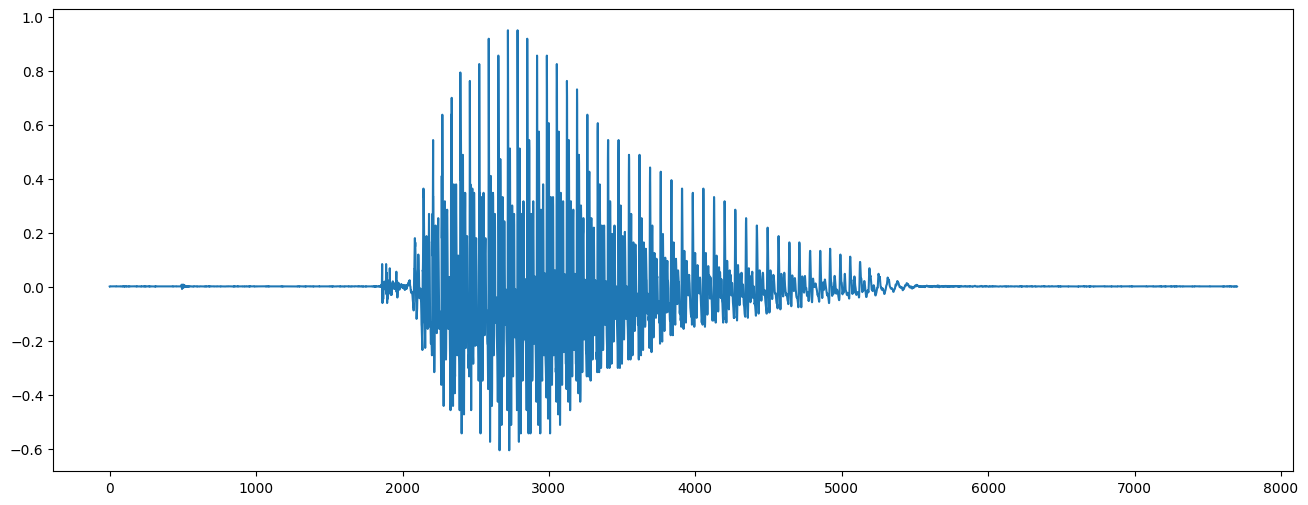

In [105]:
# insert your code here
plt.plot(go)
go_voiced_6 = go[2980:3400] # battle tested

In [106]:
# # make the plot not interactive
# %matplotlib inline
# import matplotlib.pyplot as plt
# # specify the size of the plot
# plt.rcParams['figure.figsize'] = (16, 6)

**4. Plot the voiced region.**

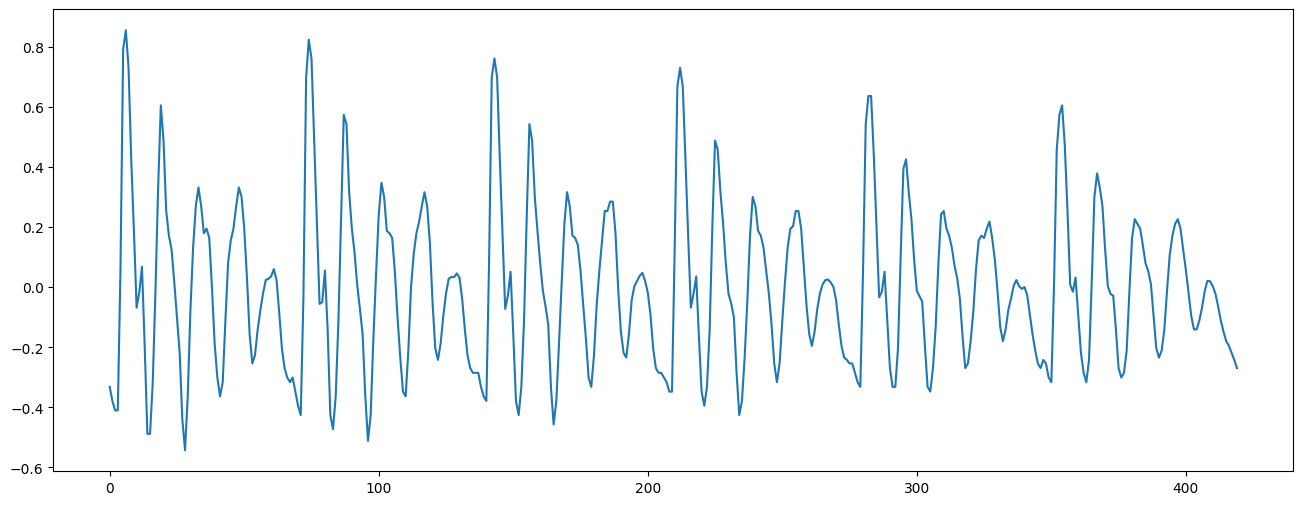

In [107]:
# insert your code here
plt.plot(go_voiced_6)


**5. Use ```DFTwin()``` to compute a $512$-point DFT of the speech segment, with a window that covers $6$ pitch periods within the voiced region, and then plot it for $0\leq \omega\leq\pi$.**

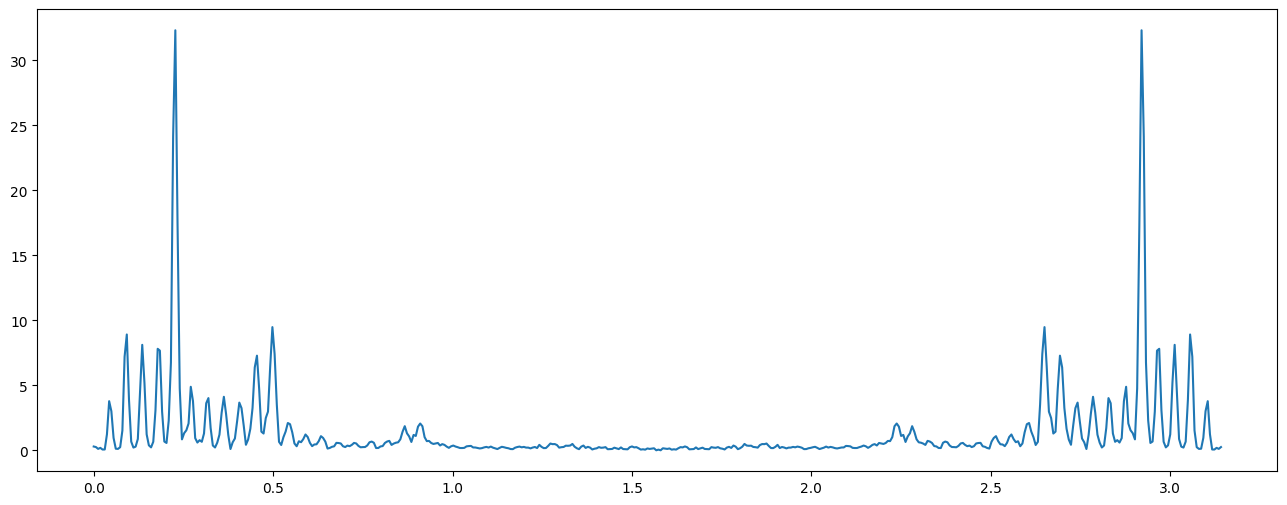

In [108]:
# insert your code here
w = np.linspace(0, np.pi, 512)
STDFT_voice = DFTwin(go, len(go_voiced_6), 2980, 512)
plt.plot(w, STDFT_voice)


**6. Describe the general shape of the spectrum, and estimate the formant frequencies for the region of voiced speech.**

Format Frequencies ~= (.2) and (pi - .2) [=] omega

There is not a general shape; however, there are peaks at the format frequencies

<h3 style="color:red;"><left>Exercise 3.4</left></h3>

**1. Complete the function below that can create a spectrogram using your ```DFTwin()``` function from the previous section. You will do this by creating a matrix of windowed DFTs, oriented as described above.**

**Important hints:**
<!-- * Remember that frequency in a spectrogram increases along the positive y-axis, which means that the first few elements of each column of the matrix will correspond to the highest frequencies -->
* You can start by initializing `A` as an empty list, then keep appending the DFT results from `DFTwin()` to it. At the end, convert it to a NumPy array by `A = np.array(A)`.
* After you do the step above, you should find that the frequency components are on the x-axis, but we want them to be on the y-axis. You might use `np.transpose()`.
* Your ```DFTwin()``` function returns the DT spectrum for frequencies between $0$ and $2\pi$. Therefore, you will only need to use the first or second half of these DFTs.
* The statement ```B[:, n]``` references the entire $n$th (zero-based index) column of the matrix ```B```.

In [109]:
def Specgm(x, L, overlap, N):
    """
    Parameters
    ---
    x: the input signal
    L: the window length
    overlap: the number of points common to successive windows
    N: the number of points computed in each DFT
    
    Returns
    ---
    A: the matrix of spectrogram
    """
    A = []
    for i in range(0, (len(x) - L) + 1, L - overlap): # ideal step is just L
      A.append(DFTwin(x, L, i, N))
    
    A = np.array(A)
    A = A[:,0:N//2] # deals with column 0:N//2 {rows, columns}
    A = np.transpose(A)

    return A

**2. Load the file ```signal.npy``` using ```np.load()```. Plot the signal.**

In [110]:
# insert your code here
signal = np.load("signal.npy")


**3. Plot the magnitude (in dB) of the wideband spectrogram, using a window length of $50$ samples and an overlap of $30$ samples.**

* In labeling the axes of the image, assume a sampling frequency of $8$ KHz. Then the frequency will range from $0$ to $4000$ Hz.
* Set the parameter `extent=[0, len(signal) / 8000, 1, 4001]` in `plt.imshow()` to correctly label the axes.
* Set the parameter `aspect='auto'` in `plt.imshow()`.
* You can get a pseudo-color mapping by setting the parameter ```cmap='jet'``` in ```plt.imshow()```. 
* Set the parameter ```origin='lower'``` or ```origin='upper'``` in ```plt.imshow()``` to place the origin of your plot in the lower/upper left corner, depending on your matrix returned by `Specgm()`.
* For more information, see the online help for the [```plt.imshow()```](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.axes.Axes.imshow.html) command.

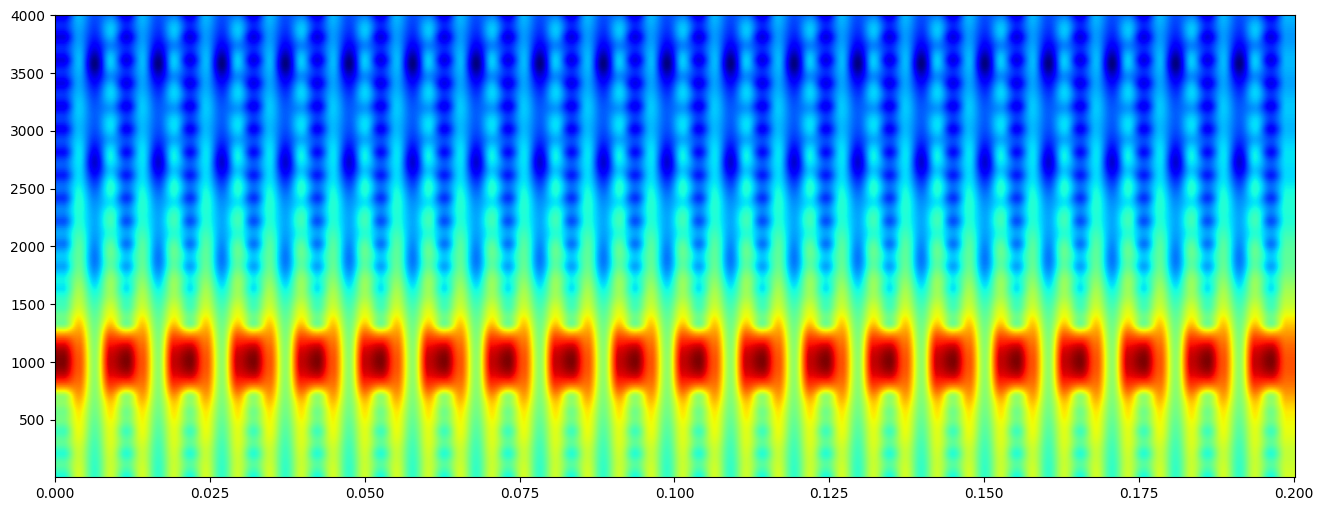

In [111]:
# insert your code here
plt.imshow(20*np.log10(Specgm(signal, 50, 30, 512)), extent=[0, len(signal) / 8000, 1, 4001], aspect='auto', cmap='jet', origin='lower')

**4. Plot the magnitude (in dB) of the narrowband spectrogram, using a window length of $320$ samples and an overlap of $60$ samples.**

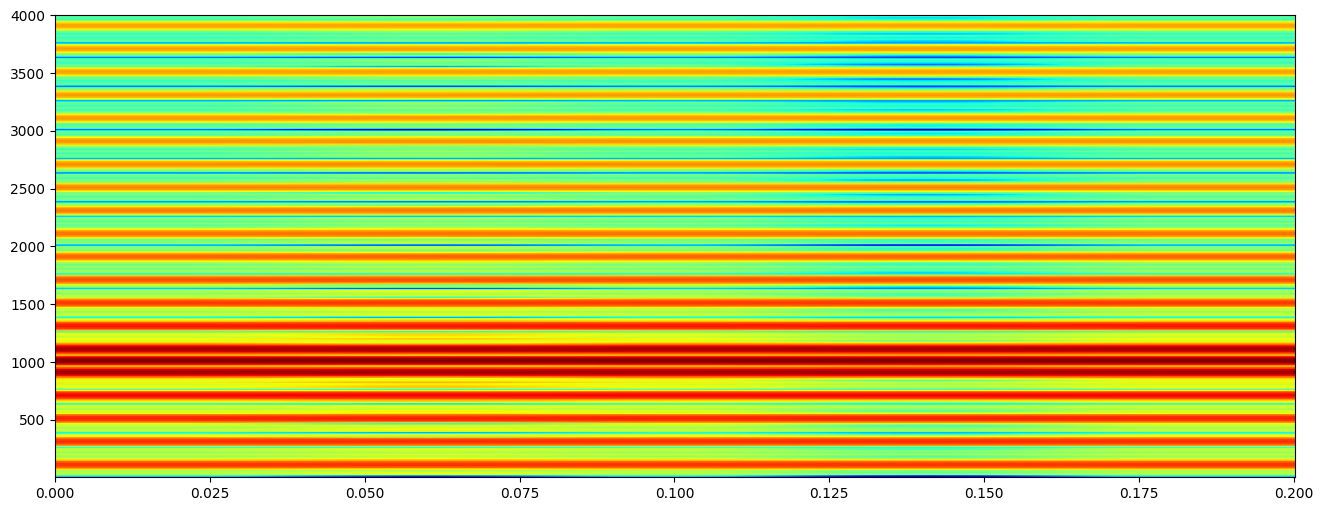

In [112]:
# insert your code here
plt.imshow(20*np.log10(Specgm(signal, 320, 60, 512)), extent=[0, len(signal) / 8000, 1, 4001], aspect='auto', cmap='jet', origin='lower')

**5. Do you see vertical striations in the wideband spectrogram? Similarly, do you see horizontal striations in the narrowband spectrogram? In each case, what causes these lines, and what does the spacing between them represent?**

insert your answer here

<h3 style="color:red;"><left>Exercise 3.6</left></h3>

**1. Run the following code to load the vowel utterances *a*, *e*, *i*, *o*, and *u* from a female speaker.**

In [113]:
a = np.load("a.npy")
e = np.load("e.npy")
i = np.load("i.npy")
o = np.load("o.npy")
u = np.load("u.npy")

**2. Plot the magnitude (in dB) of the narrowband spectrogram of each of the utterances.**

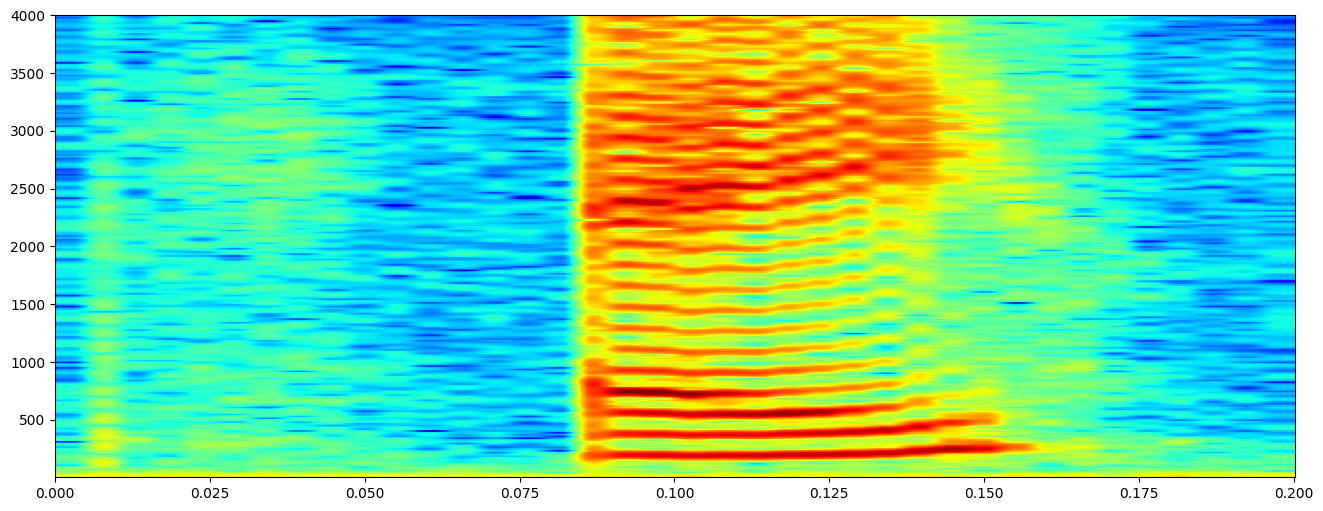

In [87]:
# insert your code here
plt.imshow(20*np.log10(Specgm(a, 320, 60, 512)), extent=[0, len(signal) / 8000, 1, 4001], aspect='auto', cmap='jet', origin='lower')

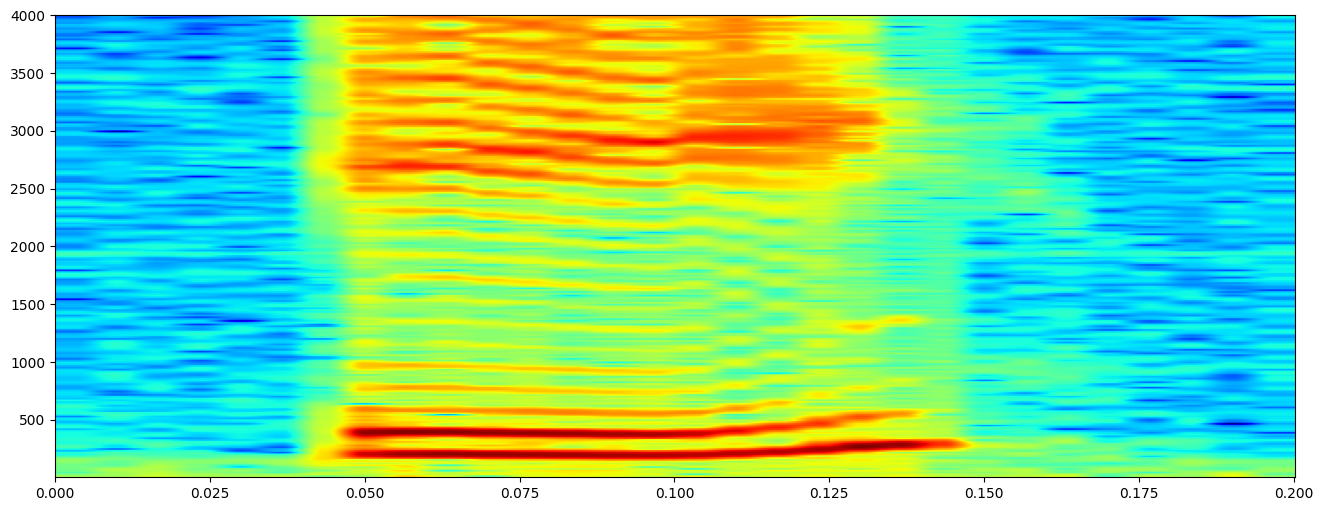

In [114]:
# insert your code here
plt.imshow(20*np.log10(Specgm(e, 320, 60, 512)), extent=[0, len(signal) / 8000, 1, 4001], aspect='auto', cmap='jet', origin='lower')

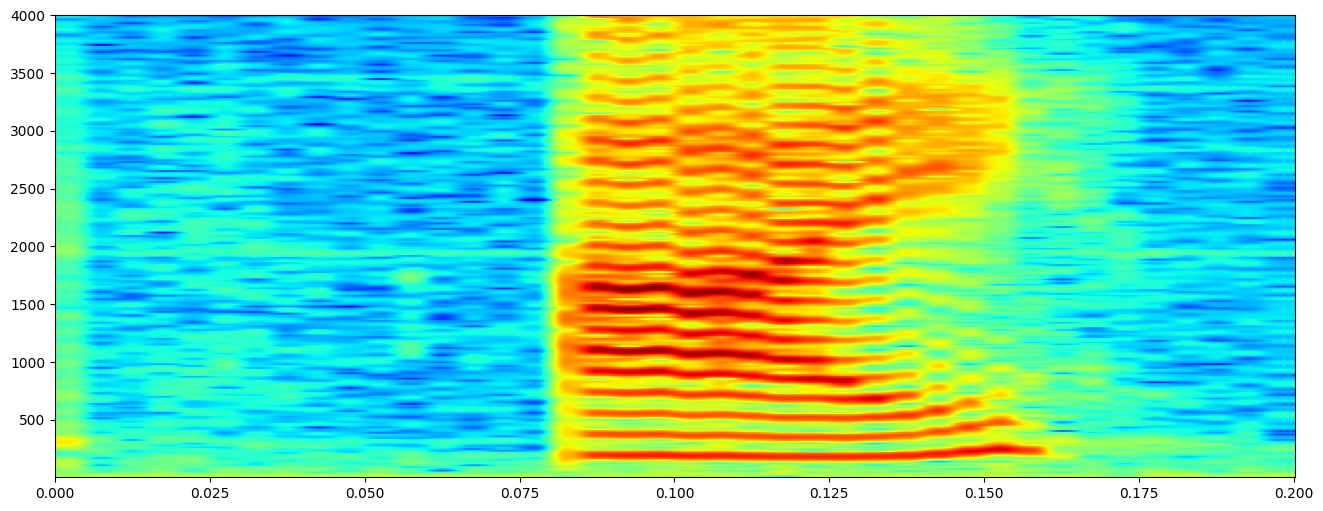

In [115]:
# insert your code here
plt.imshow(20*np.log10(Specgm(i, 320, 60, 512)), extent=[0, len(signal) / 8000, 1, 4001], aspect='auto', cmap='jet', origin='lower')

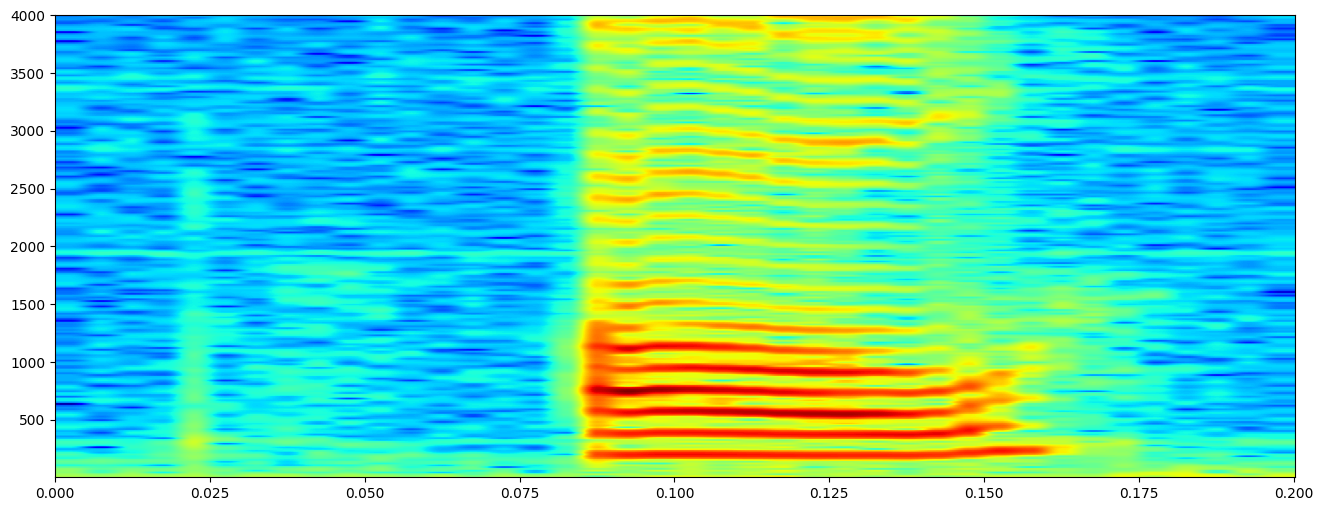

In [116]:
# insert your code here
plt.imshow(20*np.log10(Specgm(o, 320, 60, 512)), extent=[0, len(signal) / 8000, 1, 4001], aspect='auto', cmap='jet', origin='lower')

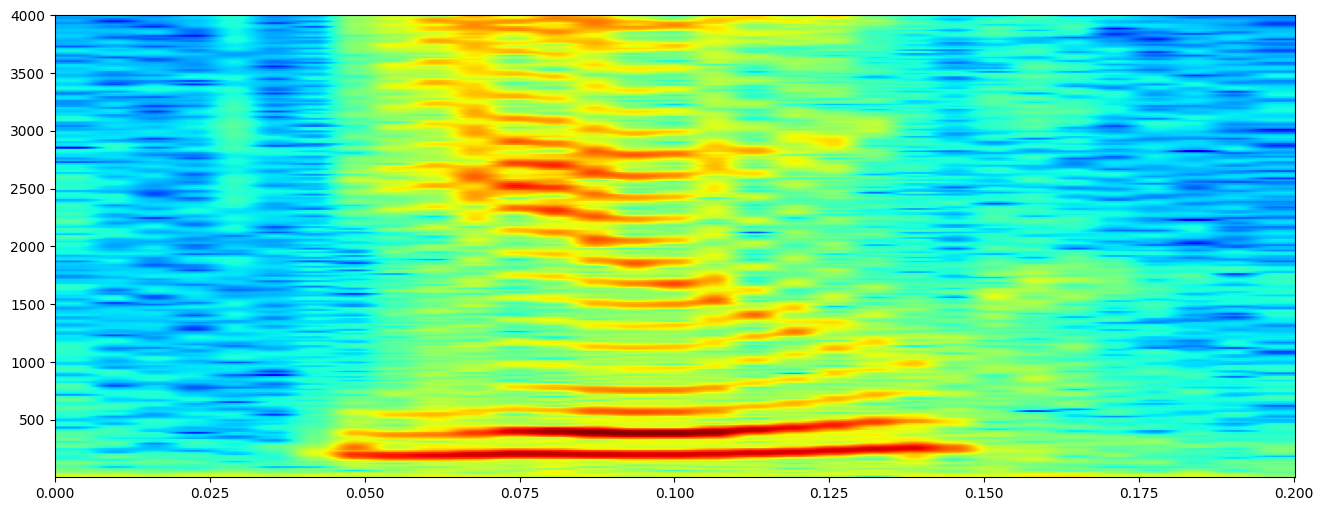

In [117]:
# insert your code here
plt.imshow(20*np.log10(Specgm(u, 320, 60, 512)), extent=[0, len(signal) / 8000, 1, 4001], aspect='auto', cmap='jet', origin='lower')

**3. For the vowels a and u, estimate the first two formant frequencies using the functions you created in the previous sections. Make your estimates at a time frame toward the beginning of the utterance, and another set of estimates toward the end of the utterance. You may want to use both the `Specgm()` and `DFTwin()` functions to determine the formants. Plot these four points in the vowel triangle provided in the file `vowel_triangle.pdf`. For each vowel, draw a line connecting the two points, and draw an arrow indicating the direction the formants are changing as the vowel is being uttered.**

For a:

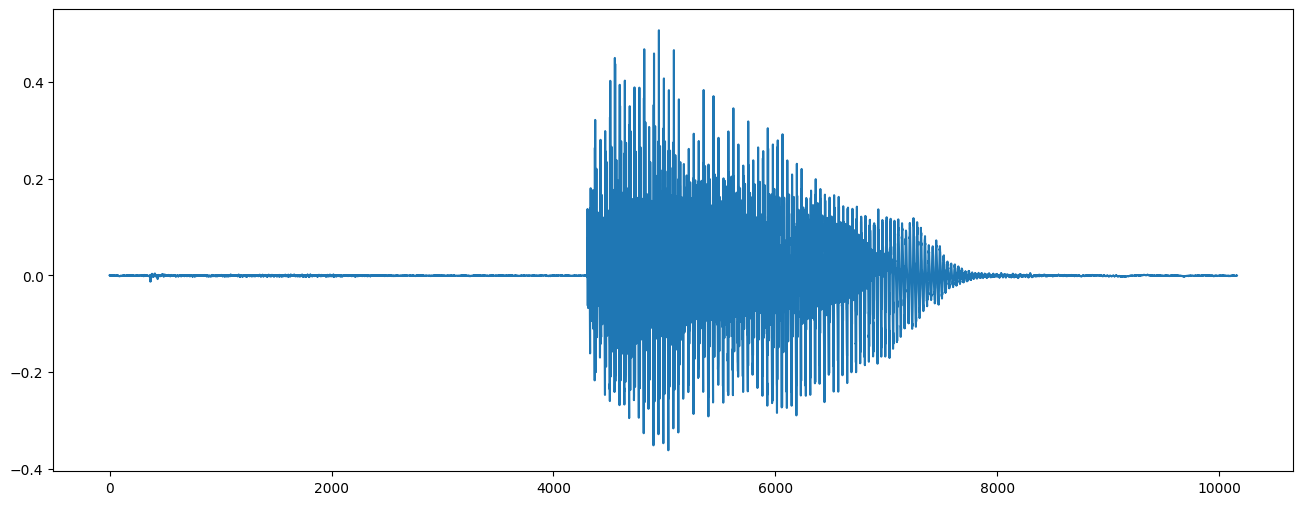

In [120]:
plt.plot(a)

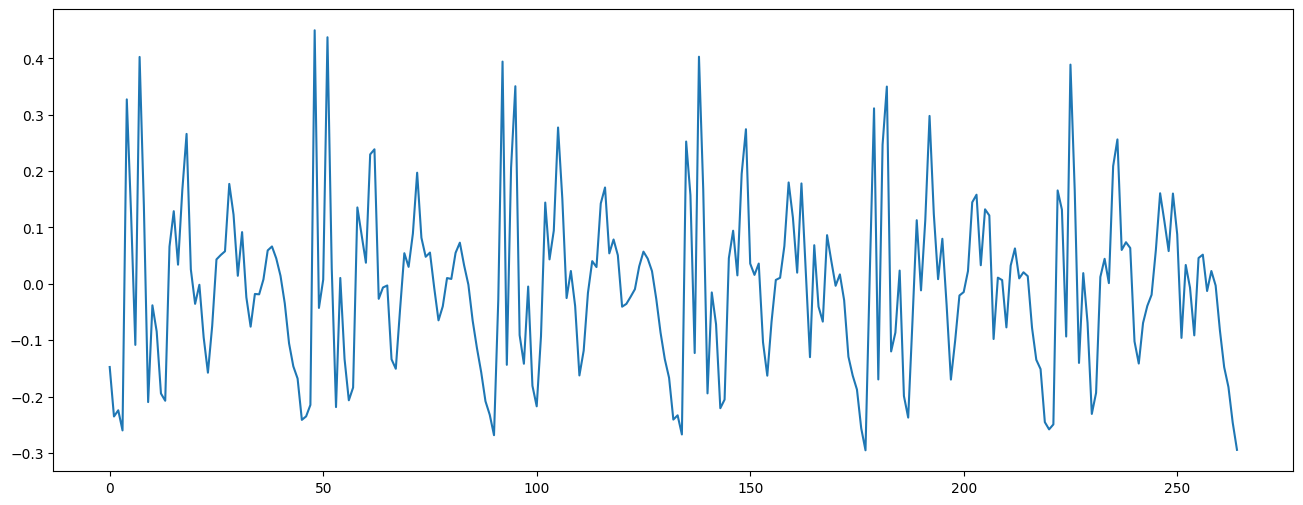

In [137]:
a_voiced = a[4505:4770]
plt.plot(a_voiced)

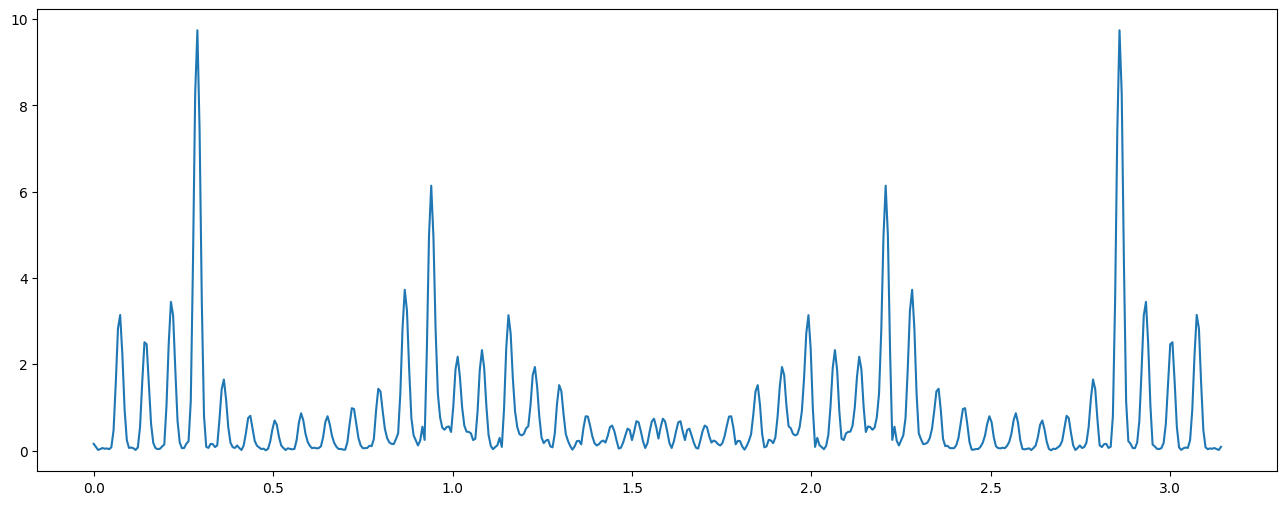

In [138]:
w = np.linspace(0, np.pi, 512)
STDFT_a = DFTwin(a, len(a_voiced), 4505, 512)
plt.plot(w, STDFT_a)

For u:

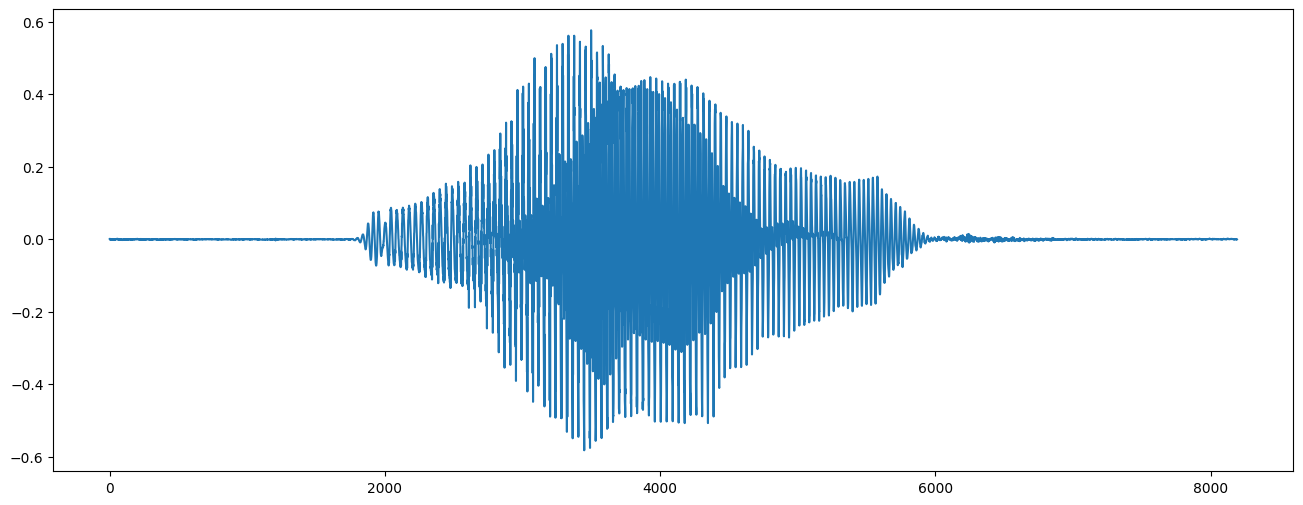

In [139]:
plt.plot(u)

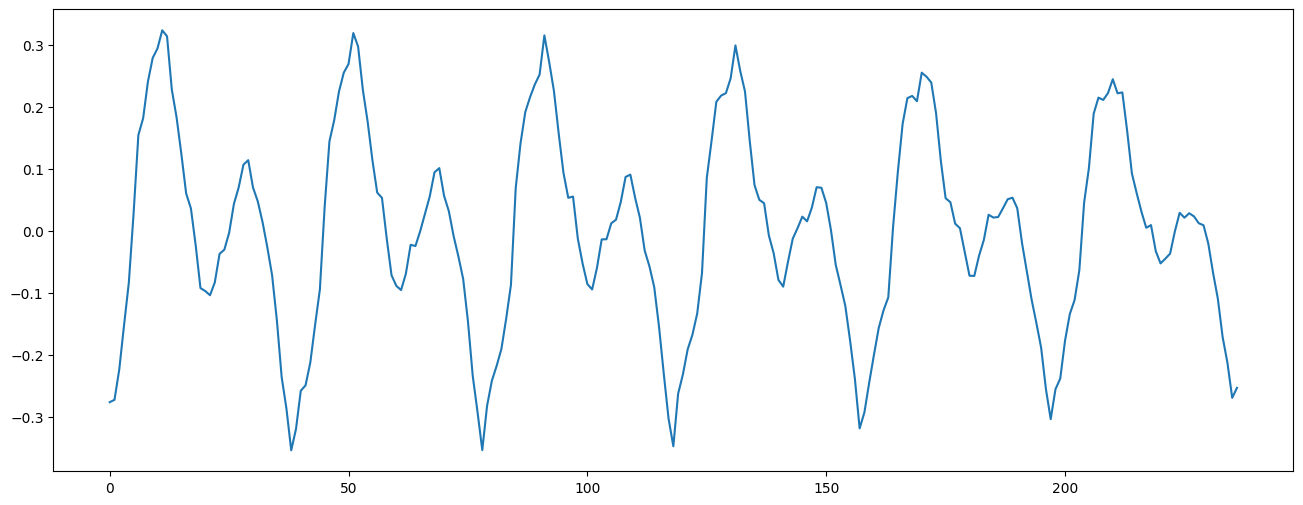

In [151]:
u_voiced = u[4510:4747]
plt.plot(u_voiced)

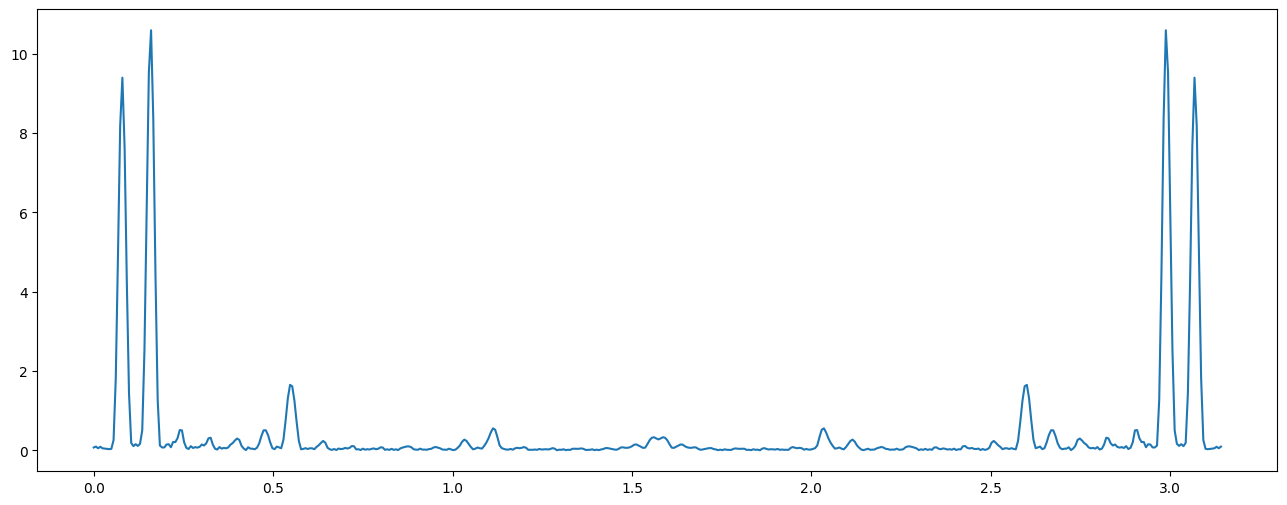

In [153]:
w = np.linspace(0, np.pi, 512)
STDFT_u = DFTwin(u, len(u_voiced), 4510, 512)
plt.plot(w, STDFT_u)

remember to append `vowel_triangle.pdf` when you submit the report on Gradescope.